<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [81]:
import pandas as pd
import numpy as np
import cv2
import mahotas
import skimage
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
import matplotlib
import skimage.color as color

In [82]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    raise notImplementedError()
# Returns the average of the red-channel pictures for the images
def ft2(image):
    raise notImplementedError()
#Returns the aspect ratio of the image

In [83]:
# 1.raw pixel feature vector
def create_rawpixel(df):
    df['raw_pixels'] = df['images'].apply(lambda x: x.flatten())
    return df

# 2.creates a column for each channels(RGB's) mean and appends to the dataframe
def color_means(df):
    channel_mean = []
    for index, rows in df.iterrows():
        means = cv2.mean(rows['images'])
        means = means[:3]
        channel_mean.append(list(means))
    channel_mean = np.asarray(channel_mean)
    df['red_mean'] = channel_mean[:,2]
    df['green_mean'] = channel_mean[:,1]
    df['blue_mean'] = channel_mean[:,0]
    return df

# 3. biggest countour area 
def contour_extent(df):
    con = []
    for index, rows in df.iterrows():
        cnt = rows['images']
        cnt = cv2.cvtColor(cnt, cv2.COLOR_BGR2GRAY)
        _, contours, hierarchy = cv2.findContours(cnt, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
        cnt = max(contour_sizes, key=lambda x: x[0])[1]
        area = cv2.contourArea(cnt)
        x,y,w,h = cv2.boundingRect(cnt)
        rect_area = w*h
        extent = (area)/rect_area
        extent = int(extent*1000000)
        con.append(extent)
    df['extent'] = con
    return df

# 4.creates a column for the aspect ratio of an image
def create_aspectratio(df):
    df['aspect_ratio'] = df['images'].apply(lambda x: x.shape[0] / x.shape[1])
    return df

# 5. number of blobs
def blobs(df):
    blob_len=[]
    for index, rows in df.iterrows():
        img = rows['images']
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        detector = cv2.SimpleBlobDetector_create()
        keypoints = detector.detect(img)
        a = len(keypoints)
        blob_len.append(a)
    df['blob'] = blob_len
    return df

# 6.The standard deviation of hue channel intensity 
def get_hue(df):
    hue = []
    for index, rows in df.iterrows():
        image = rows['images']
        std = color.rgb2hsv(image)[0].std()
        hue.append(std)
    df['hue']= hue
    return df

# 7.The standard deviation of saturation channel intensity 
def get_saturation(df):
    sat = []
    for index, rows in df.iterrows():
        image = rows['images']
        std = color.rgb2hsv(image)[1].std()
        sat.append(std)
    df['saturation']= sat
    return df

# 8.The standard deviation of brightness channel intensity 
def get_brightness(df):
    bright = []
    for index, rows in df.iterrows():
        image = rows['images']
        std = color.rgb2hsv(image)[2].std()
        bright.append(std)
    df['brightness']= bright
    return df

# 9.Calculate the mean gray scale intensity of an image
def greyscale(x):
    try:
        x = np.float32(cv2.cvtColor(x, cv.COLOR_BGR2GRAY))
    except:
        x = np.float32(x)
    return(x)

# 9. Grayscale Intensity
def create_gsi(df):
    df['gsi'] = df['images'].apply(lambda x: greyscale(x).flatten().mean())
    return df

# 10.create and add channel standard deviations to the the RGB channel intensities
def create_std(df):
    std_red = []
    std_green = []
    std_blue = []
    for index, rows in df.iterrows():
        (means, stds) = cv2.meanStdDev(rows['images'])
        std_red.append(stds[2][0])
        std_green.append(stds[1][0])
        std_blue.append(stds[0][0])
    df['red_std'] = np.asarray(std_red)
    df['green_std'] = np.asarray(std_green)
    df['blue_std'] = np.asarray(std_blue)
    return df
    

# 6.creating a color histogram for the image
def create_colorhist(df):
    col_hist = []
    for index, rows in df.iterrows():
        image = rows['images']
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = hist.flatten()
        col_hist.append(np.asarray(hist))
    print()
    df1 = pd.DataFrame(index= df.index)
    df1['histogram'] = list(np.asarray(col_hist))
    xs = pd.DataFrame(df1.histogram.tolist(), index= df1.index)
    #s = pd.Series(col_hist).apply(lambda x: get_top_pcs(x))
    #xs = pd.DataFrame(s.values.tolist())
    return xs      

# 11. Haralick texture
import mahotas
def fd_haralick(df):
    harlick = []
    for index, rows in df.iterrows():
        # convert the image to grayscale
        image = rows['images']
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # compute the haralick texture feature vector
        haralick = mahotas.features.haralick(gray).mean(axis=0)
        harlick.append(haralick)
    df1 = pd.DataFrame(index= df.index)
    df1['haralick'] = list(np.asarray(harlick))
    xs = pd.DataFrame(df1.haralick.tolist(), index= df1.index)
    return xs

# 12. Hu moments features
def fd_hu(df):
    hu = []
    for index, rows in df.iterrows():
        image = rows['images']
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        feature = cv2.HuMoments(cv2.moments(image)).flatten()
        hu.append(feature)
    df1 = pd.DataFrame(index= df.index)
    df1['hu'] = list(np.asarray(hu))
    xs = pd.DataFrame(df1.hu.tolist(), index= df1.index)
    return xs

# 13. Hog Transformations
from skimage.feature import hog
def get_top_pcs(x, N=10):
    u, s, vt = np.linalg.svd(x, full_matrices = False)
    top_pcs = s[:N]
    return(top_pcs)
def hog_transformation(df):
    hog_images = []
    for index,rows in df.iterrows():
        img = rows['images']
        img = cv2.resize(img, (64, 128))
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16,16),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
        hog_images.append(hog_image)
    s = pd.Series(hog_images).apply(lambda x: get_top_pcs(x))
    xs = pd.DataFrame(s.values.tolist())
    return xs   

# 14. Canny Corner detection
from skimage import feature

def canny(df):
    canny_list = []
    for index,rows in df.iterrows():
        image = rows['images']
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = feature.canny(image)
        pca_edges = get_top_pcs(edges, N=10)
        canny_list.append(pca_edges)
    s = pd.Series(canny_list)
    xs = pd.DataFrame(s.values.tolist())
    return xs

# 15. Image size
def get_imagesize(df):
    df['image_size'] = df['images'].apply(lambda x: len(x))
    return df

 We expect all external sources sited, and significant indication of EDA. 

<h4> DataFrame Creation </h4>

In [84]:
# helper functions for creating dataframe
# create dataframe from a series object
def create_dataframe(ds):
    ds = ds.reset_index(drop=True)
    return ds

# cleaning the image values to convert some grayscale images to RGB
def graytorgb(df):
    for i in range(0, df.shape[0]):
        if len(df['images'].iloc[i].shape) == 2:
            df['images'].iloc[i] = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        return df

# 12. Constructing the dataframe with the scalar features
def create_scalarfeatures(df):
    #df = create_dataframe(df)
    df = color_means(df)
    df = create_std(df)
    df = create_aspectratio(df)
    df = get_imagesize(df) 
    df = create_gsi(df)
    #df = contour_extent(df)
    df = get_hue(df)
    df = get_saturation(df)
    df = get_brightness(df)
    #df = blobs(df)
    return df

def create_vectorfeatures(df, func):
    vector_df = func(df)
    X_vector = pd.concat([df, vector_df], axis = 1)
    return X_vector    

In [85]:
# Function to create the feature dataframe
def feature_frame(df):
    df = create_scalarfeatures(df)
    df = create_vectorfeatures(df, create_colorhist)
    df = create_vectorfeatures(df, fd_haralick)
    df = create_vectorfeatures(df, hog_transformation)
    #df = create_vectorfeatures(df, fd_hu)
    df = create_vectorfeatures(df, canny)
    return df
    #Returns data-frame with all the features now inside, and calculated


In [86]:
# Creating dataframe and storing it as a pickle file for future access
starting_data = pd.read_pickle("./starting_data.pkl")
features = feature_frame(starting_data)
# storing in a pickle file for access in the next notebook
features.to_pickle("./all_features.pkl")

In [87]:
# checking the feature matrix of dataframe
features.shape

(1501, 559)

In [88]:
# Displaying the top 5 rows of the dataframe
features.head()

,images,encodings,red_mean,green_mean,blue_mean,red_std,green_std,blue_std,aspect_ratio,image_size,...,0,1,2,3,4,5,6,7,8,9
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,111.753798,147.788681,170.123787,89.914294,68.085443,64.391428,0.419847,165,...,42.984494,15.907792,15.846335,13.707360,13.040841,12.771055,12.213356,12.085804,11.694242,11.392373
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0,67.531631,104.499870,98.426973,72.463596,62.734611,67.497923,0.436090,174,...,44.058098,23.417277,20.835219,19.138015,17.392399,15.588376,13.654221,12.990994,12.284540,11.924459
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,163.577814,175.592150,174.865318,84.928914,78.290643,77.065435,0.436224,171,...,33.060820,18.492408,14.665498,12.521926,11.596811,11.462256,11.031741,10.872545,10.240835,10.021041
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,164.805242,189.280101,210.739822,70.417988,74.486619,55.293247,0.458853,184,...,18.241287,11.750869,9.612507,8.795640,8.546952,8.286891,8.189137,8.091324,7.839032,7.655230
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,127.917054,155.967905,147.548565,95.621769,73.357112,74.451166,0.357868,141,...,33.068713,20.421500,16.813979,13.724453,12.900392,12.475885,11.141593,10.686441,10.067296,9.812907


<h2> Graphs </h2>

<h4> Displaying the first three images </h4>

Text(0.5, 1, 'Image: 1')

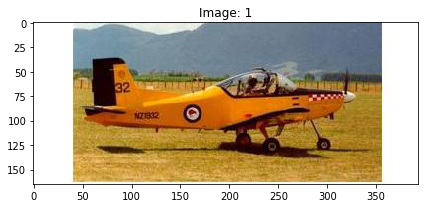

In [89]:
# Showing the first three images in the dataset
skimage.io.imshow(starting_data['images'][0])
plt.title('Image: 1')

Text(0.5, 1, 'Image: 2')

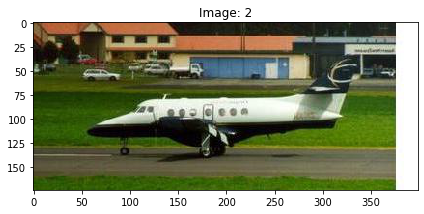

In [90]:
skimage.io.imshow(starting_data['images'][1])
plt.title('Image: 2')

Text(0.5, 1, 'Image: 3')

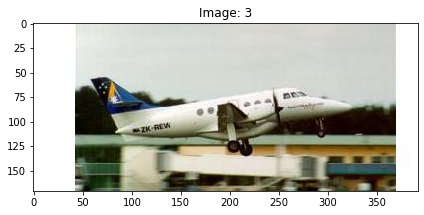

In [91]:
skimage.io.imshow(starting_data['images'][2])
plt.title('Image: 3')

<h4> Distribution of different image categories in the training dataset </h4>

Text(0, 0.5, 'Count')

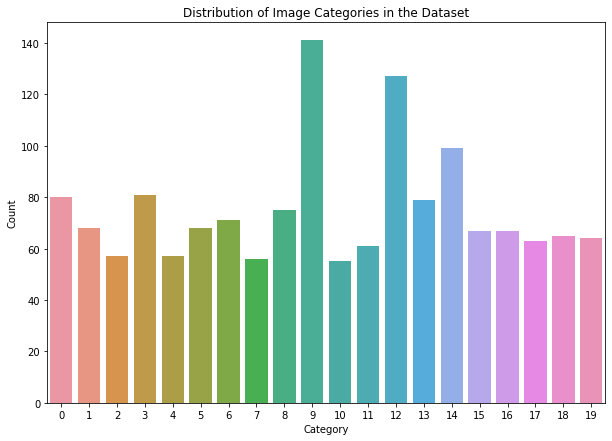

In [92]:
import seaborn as sns
# Visualizing the distribution of images
plt.figure(figsize=(10,7))
sns.countplot(features['encodings'])
plt.title('Distribution of Image Categories in the Dataset')
plt.xlabel('Category')
plt.ylabel('Count')

<h4> Visualizing image sizes of the all training images </h4>

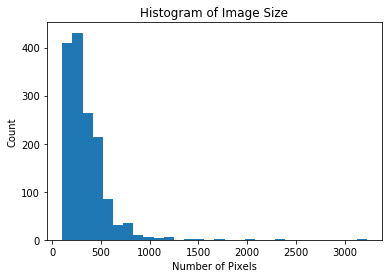

In [93]:
#Visualising the overall image size of images 
image_size = features['image_size']
plt.hist(image_size, bins=30)
plt.title('Histogram of Image Size')
plt.xlabel('Number of Pixels')
plt.ylabel('Count')
plt.show()

<h4> Visualising image sizes across different categories  </h4>

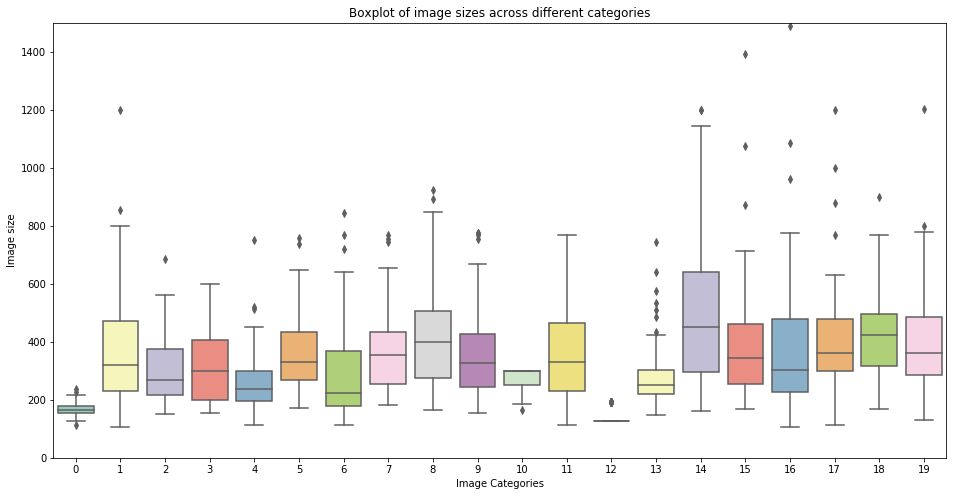

In [94]:
# Visualising image sizes across different categories.
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x ="encodings", y="image_size", data= features, palette="Set3")
plt.title('Boxplot of image sizes across different categories')
plt.xlabel('Image Categories')
plt.ylabel('Image size')
plt.ylim(0,1500)
plt.show()

<h4> Visualising aspect ratio of images across different categories  </h4>

Text(0, 0.5, 'Aspect Ratio')

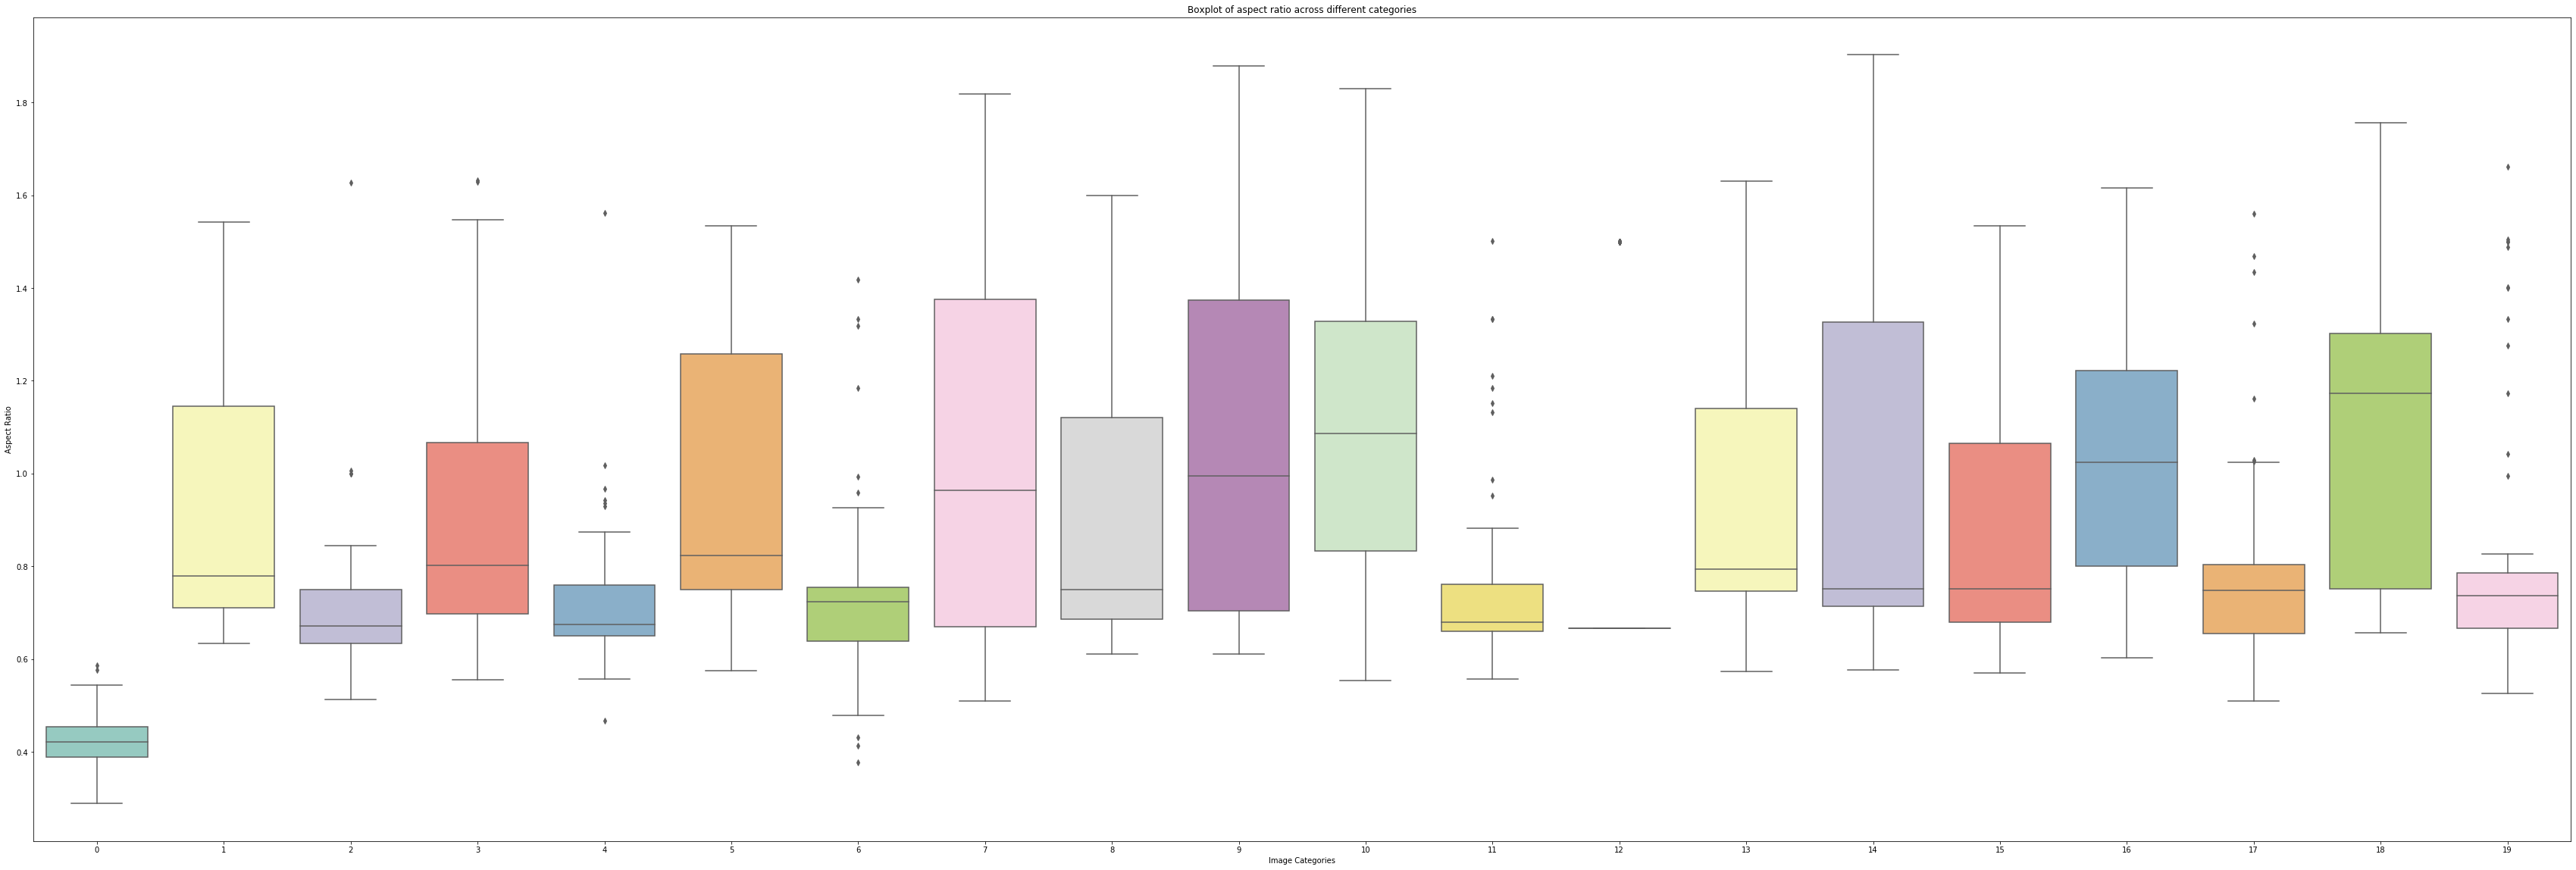

In [95]:
plt.figure(figsize=(60,20))
ax = sns.boxplot(x ="encodings", y="aspect_ratio", data= features, palette="Set3")
plt.title('Boxplot of aspect ratio across different categories')
plt.xlabel('Image Categories')
plt.ylabel('Aspect Ratio')

<h4> Displaying the standard deviation of hue values across different categories </h4>

Text(0, 0.5, 'Standard Deviation of Hue Values')

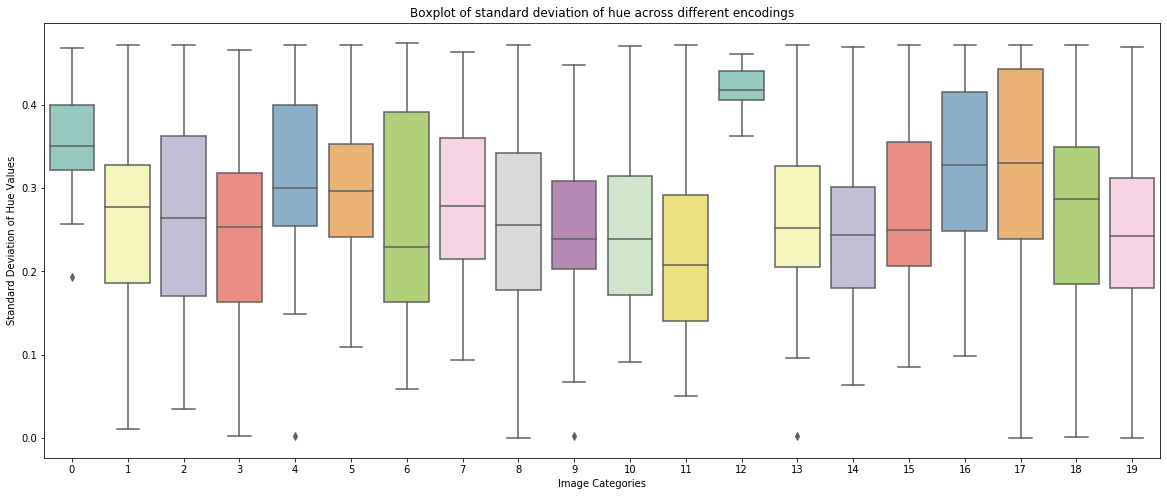

In [96]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x ="encodings", y="hue", data= features, palette="Set3")
plt.title('Boxplot of standard deviation of hue across different encodings')
plt.xlabel('Image Categories')
plt.ylabel('Standard Deviation of Hue Values')

<h4>Displaying the standard deviation of hue values across different categories </h4>

Text(0, 0.5, 'Standard Deviation of Saturation Values')

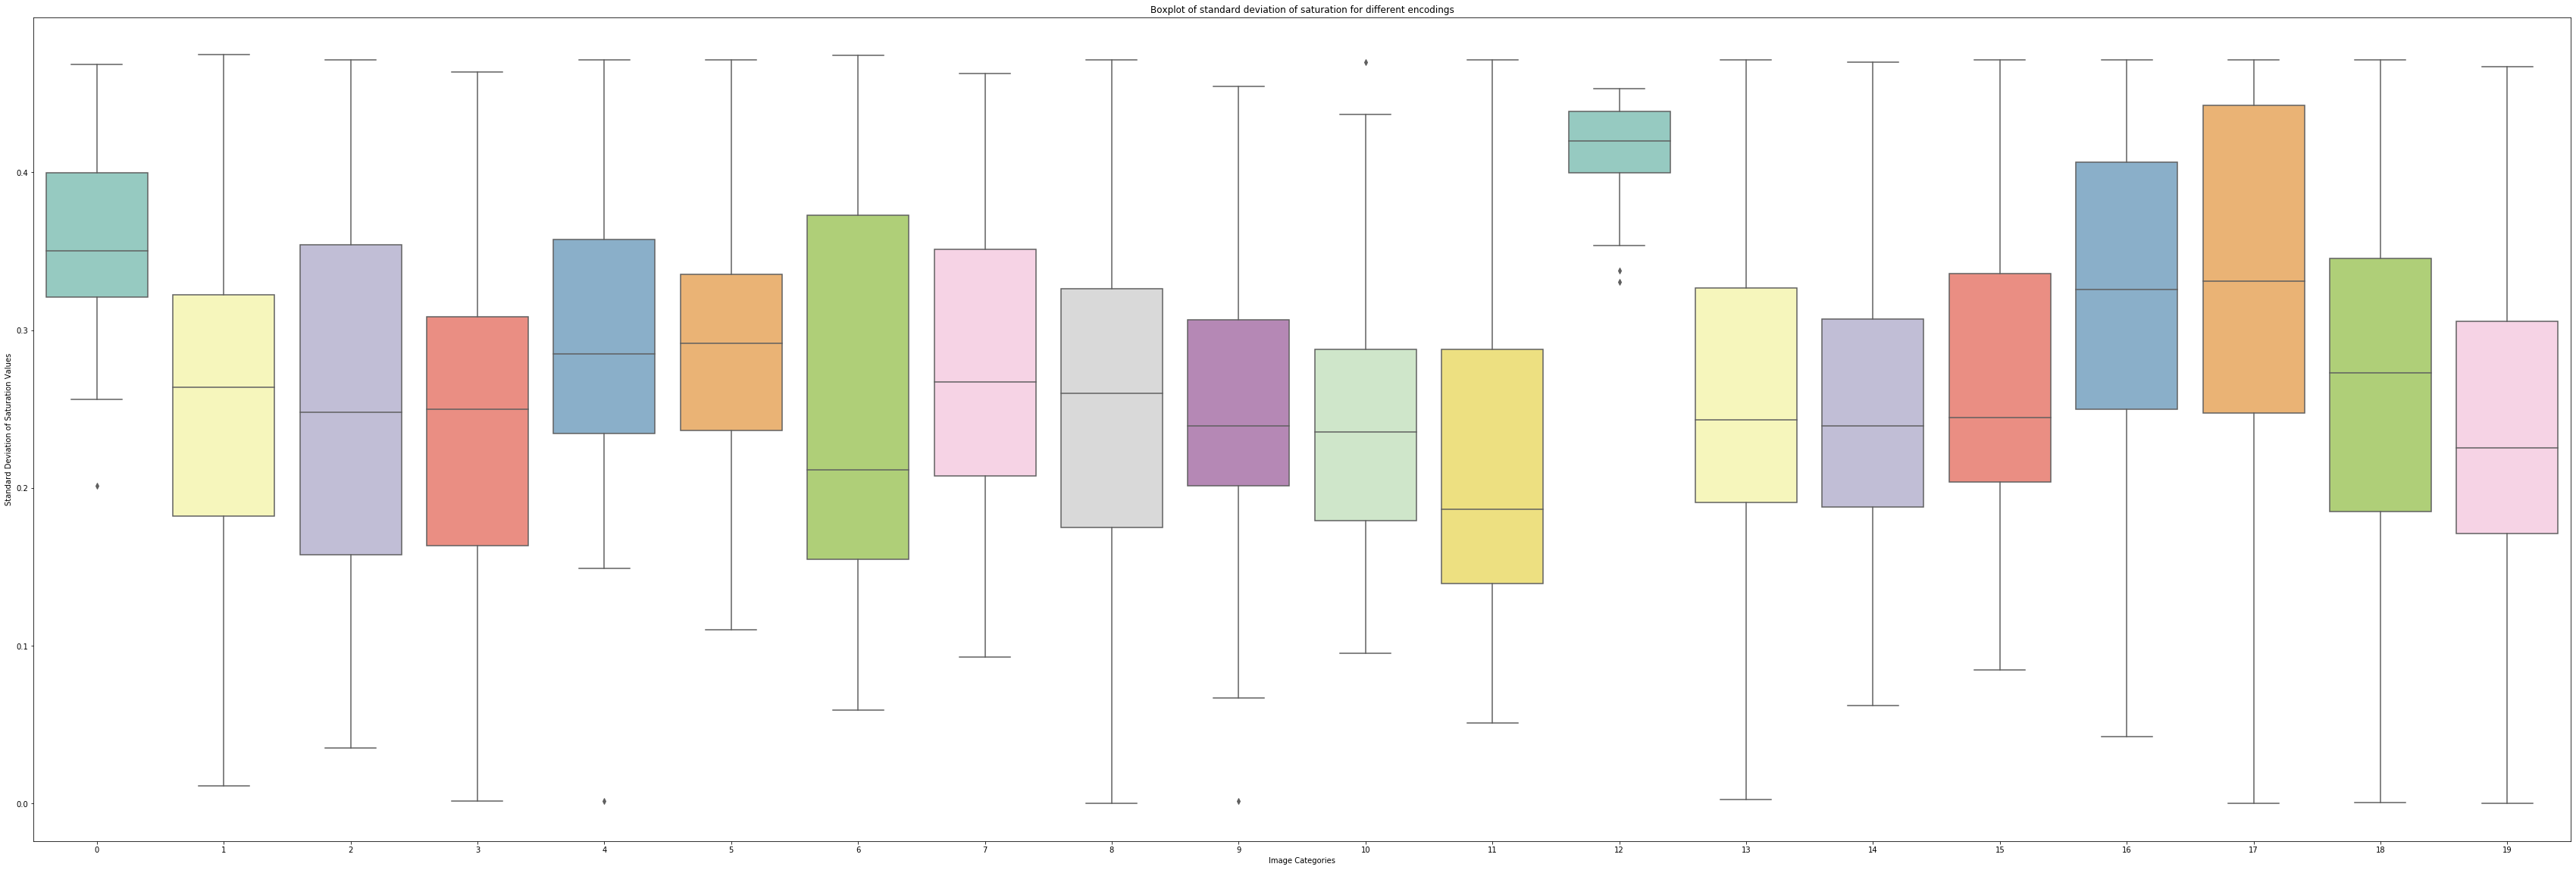

In [97]:
plt.figure(figsize=(60,20))
ax = sns.boxplot(x ="encodings", y="saturation", data= features, palette="Set3")
plt.title('Boxplot of standard deviation of saturation for different encodings')
plt.xlabel('Image Categories')
plt.ylabel('Standard Deviation of Saturation Values')

<h4> Visualising red channel intensity mean across different categories  </h4>

Text(0.5, 1, 'Distribution of Red Channel Intensity Mean for different encodings')

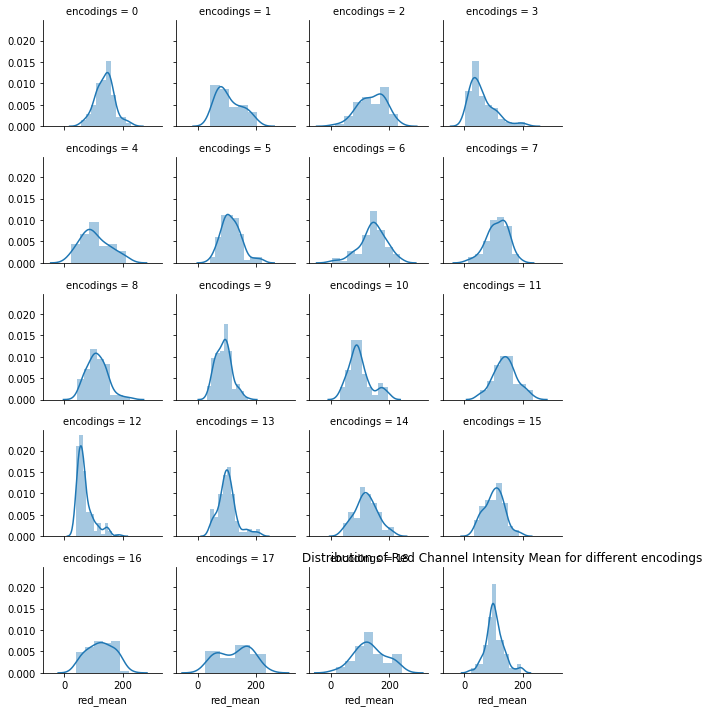

In [98]:
g = sns.FacetGrid(features, col="encodings",col_wrap=4, height=2)
g.map(sns.distplot, "red_mean");
plt.title("Distribution of Red Channel Intensity Mean for different encodings")

<h4> Visualising blue channel intensity mean across different categories  </h4>

Text(0.5, 1, 'Distribution of Blue Channel Intensity Mean for different encodings')

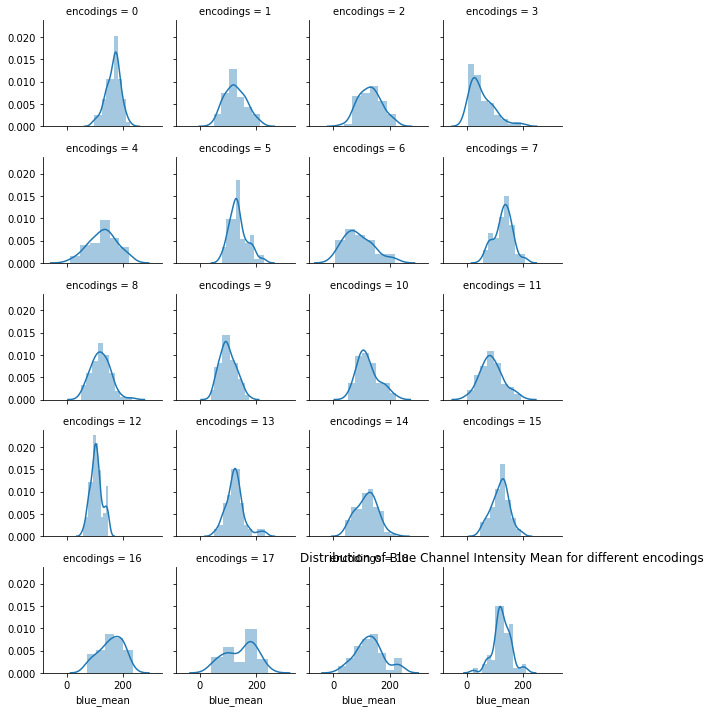

In [99]:
g = sns.FacetGrid(features, col="encodings",col_wrap=4, height=2)
g.map(sns.distplot, "blue_mean", kde= True);
plt.title("Distribution of Blue Channel Intensity Mean for different encodings")

<h4> Visualising green channel intensity mean across different categories  </h4>

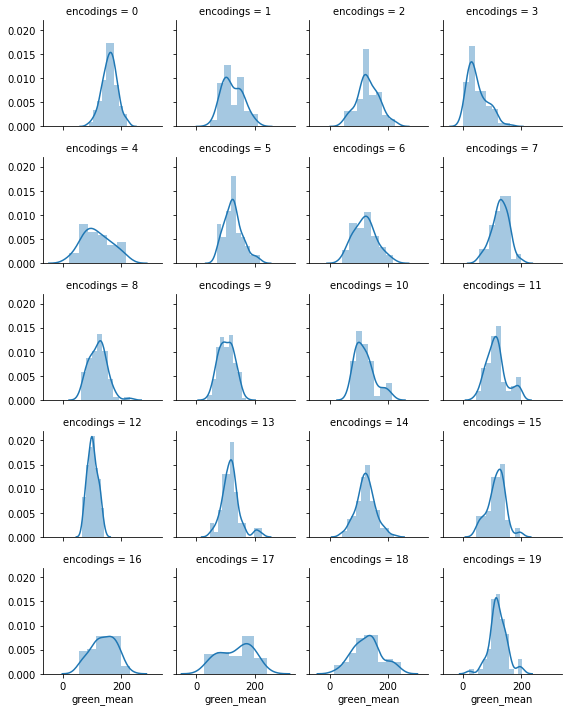

In [100]:
g = sns.FacetGrid(features, col="encodings",col_wrap=4, height=2)
g.map(sns.distplot, "green_mean", kde= True);
#plt.title("Distribution of Green Channel Intensity Mean for different encodings")

<h4> Visualising standard deviation of brightness across different categories  </h4>

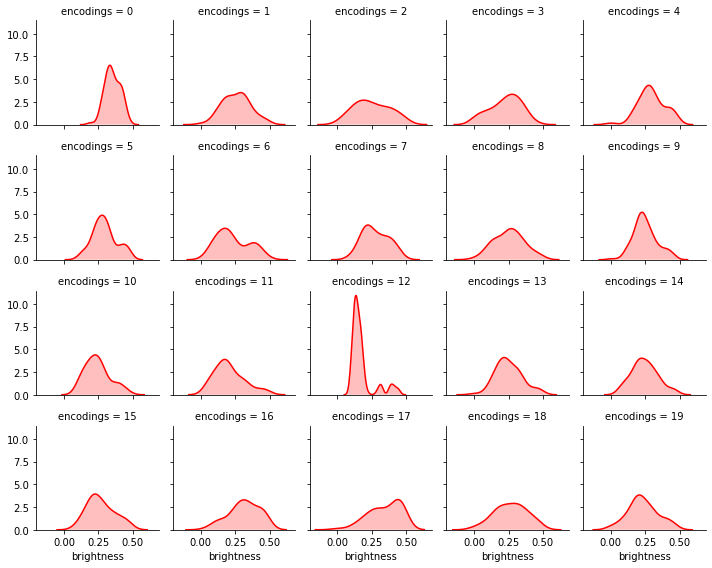

In [101]:
g = sns.FacetGrid(features, col="encodings", col_wrap=5, height=2)
plt.title("Distribution of standard deviation of brightness across different categories",)
g.map(sns.kdeplot, "brightness", shade = True, color='r');

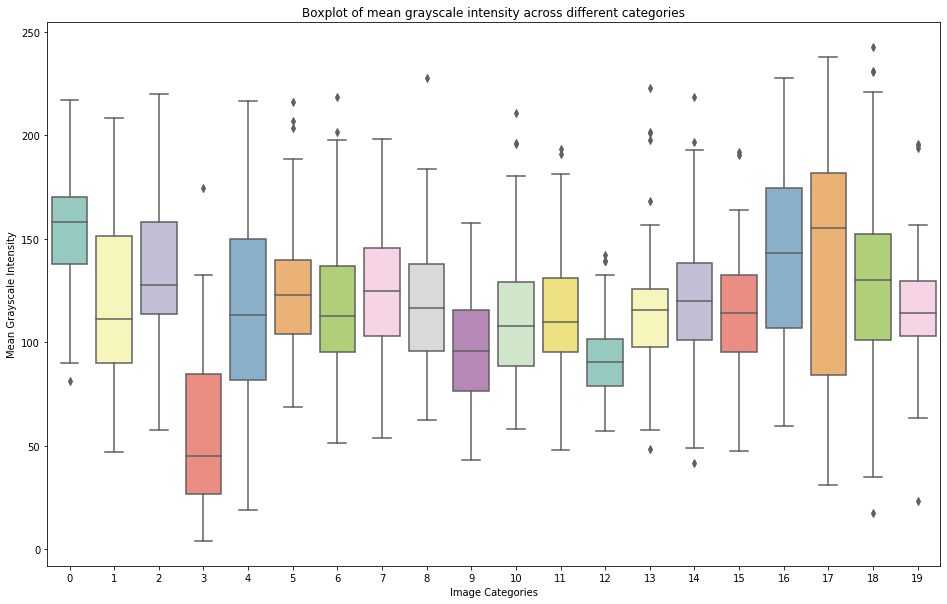

In [102]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x ="encodings", y= "gsi", data= features, palette="Set3")
plt.title('Boxplot of mean grayscale intensity across different categories')
plt.xlabel('Image Categories')
plt.ylabel('Mean Grayscale Intensity')
plt.show()

<h4> Sources </h4>

# Features and Sources
Number of Blobs : https://www.learnopencv.com/blob-detection-using-opencv-python-c/

Hu, Haralick, Color Histogram features: https://github.com/Gogul09/image-classification-python/blob/master/global.py

Canny Edge Detection: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html#contour-properties

Hog: https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

<h2> Applying Features for the Test Dataset </h2>

In [103]:
validation = pd.read_pickle("./validation.pkl")

In [104]:
validation.head()

,images
0,"[[[80, 79, 74], [56, 55, 50], [54, 53, 48], [4..."
1,"[[[10, 15, 19], [10, 15, 19], [11, 16, 19], [1..."
2,"[[[232, 231, 247], [250, 249, 255], [235, 234,..."
3,"[[[97, 75, 77], [98, 76, 78], [99, 77, 79], [1..."
4,"[[[19, 46, 55], [19, 46, 53], [20, 47, 54], [2..."


In [105]:
# Adding features to the validation set
validation = create_scalarfeatures(validation)
validation = create_vectorfeatures(validation, create_colorhist)
validation = create_vectorfeatures(validation, fd_haralick)
validation = create_vectorfeatures(validation, hog_transformation)


In [106]:
validation= create_vectorfeatures(validation, canny)

In [107]:
# Checking the validation data with features
validation.head()

,images,red_mean,green_mean,blue_mean,red_std,green_std,blue_std,aspect_ratio,image_size,gsi,...,0,1,2,3,4,5,6,7,8,9
0,"[[[80, 79, 74], [56, 55, 50], [54, 53, 48], [4...",105.590887,106.905494,105.980433,63.113690,65.316848,67.205121,0.666667,600,106.158943,...,117.297565,34.232678,32.878398,29.005475,25.555828,24.686739,23.290170,22.989385,22.319277,21.964257
1,"[[[10, 15, 19], [10, 15, 19], [11, 16, 19], [1...",133.982324,147.593426,144.792694,76.796918,77.287288,79.839361,0.526971,127,142.122818,...,43.398960,15.082354,12.493329,12.362325,11.596832,11.478634,11.132461,10.963558,10.656844,10.534601
2,"[[[232, 231, 247], [250, 249, 255], [235, 234,...",118.584796,123.831301,133.637670,82.262728,72.801423,68.821922,1.171141,349,125.351227,...,46.389485,15.990234,14.077865,13.464680,13.164153,13.119728,12.832857,12.655425,12.461065,12.150848
3,"[[[97, 75, 77], [98, 76, 78], [99, 77, 79], [1...",85.577701,83.622675,96.696962,48.460702,52.434449,61.854443,0.656085,124,88.632446,...,12.859624,8.032485,7.537371,7.359279,7.009928,6.901412,6.594401,6.506458,6.262527,6.010276
4,"[[[19, 46, 55], [19, 46, 53], [20, 47, 54], [2...",46.887554,40.598455,23.246266,34.166635,28.859210,25.818695,1.502146,350,36.910759,...,38.523634,15.513084,14.379549,13.479627,13.167478,13.075156,12.933879,12.260186,12.130840,12.046690


In [108]:
# Validation list excludes the encodings
validation.shape

(716, 558)

In [109]:
# The training list includes the encodings, hence extra columns
features.shape

(1501, 559)

In [110]:
# copying the validation data to pickle file for retrieval later
validation.to_pickle("./validation_features.pkl")